# Pauline Lallinec
## 12251066

### Homework #2

#### I. [20pt] Getting Data: Download the data for Homework2 from Moodle. This is an archive named Homework2-data-archive.

##### I. [5pt] Get your CSV file named: ge16-results-elected-[your-student-number].csv. Get the json file common to all students named: ge16-twittercounter-candidates.json

In [208]:
%ls

ge16-results-elected-12251066.csv    Homework2-Notebook.ipynb
ge16-twittercounter-candidates.json  My_Homework_2.ipynb
helpful resources/


##### I. [10pt] Merge the 2 files (your CSV file and the json file) into a single CSV file named ge16-candidates-twitter-elected-[your-student-number].csv

In [209]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [210]:
csv_data = pd.read_csv('ge16-results-elected-12251066.csv')

In [211]:
json_data = json.load(open('ge16-twittercounter-candidates.json'))

In [212]:
#This makes a nice data frame from the json data
json_data = pd.io.json.json_normalize(json_data)

In [213]:
#Rename the 'ID' column from the json file so that it matches the Twitter ID from the csv file
json_data = json_data.rename(columns= {'id':'Twitter ID'})

In [214]:
#check the data types from the csv file
csv_data.dtypes

Twitter ID       int64
Lastname        object
Firstname       object
Fullname        object
Gender          object
Party           object
Constituency    object
Elected          int64
OnTwitter        int64
dtype: object

In [215]:
#check the data types from the json file
json_data.dtypes

constituency               object
day_follower_change        object
firstname                  object
followers                   int64
following                   int64
fullname                   object
Twitter ID                 object
last_tweet                 object
lastname                   object
overall_follower_change    object
party                      object
screen_name                object
tweets                      int64
dtype: object

In [216]:
#Change the data type from 'Twitter ID' so that both the json and the csv file use the same data type
json_data['Twitter ID'] = json_data['Twitter ID'].astype('int64')

In [217]:
#merge both files
master_data = pd.merge(csv_data, json_data, how='left', on = 'Twitter ID')

In [218]:
#print merged tables to csv
master_data.to_csv('ge16-candidates-twitter-elected-12251066.csv')
%ls

ge16-candidates-twitter-elected-12251066.csv  helpful resources/
ge16-results-elected-12251066.csv             Homework2-Notebook.ipynb
ge16-twittercounter-candidates.json           My_Homework_2.ipynb


##### I. [5pt] Only keep unique columns from each file (e.g., only one column named Party in the merged CSV file). Show the first 10 rows in your resulting CSV file.

In [219]:
#checking for doubles
master_data.dtypes

Twitter ID                   int64
Lastname                    object
Firstname                   object
Fullname                    object
Gender                      object
Party                       object
Constituency                object
Elected                      int64
OnTwitter                    int64
constituency                object
day_follower_change         object
firstname                   object
followers                  float64
following                  float64
fullname                    object
last_tweet                  object
lastname                    object
overall_follower_change     object
party                       object
screen_name                 object
tweets                     float64
dtype: object

In [220]:
#Identifying doubles and dropping them
to_drop = ['constituency', 'firstname', 'fullname', 'lastname', 'party']

for element in to_drop:
    master_data = master_data.drop(element, 1)

master_data.head(10)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,day_follower_change,followers,following,last_tweet,overall_follower_change,screen_name,tweets
0,432054563,Cowen,Barry,Barry Cowen,Male,ff,Offaly,1,1,+3,2334,1110,3 days ago,+195,cowenbarry,626
1,315468577,Dunphy,Una,Una Dunphy,Female,ind,Waterford,0,1,+2,822,1072,2 days ago,+88,unadunphy,10194
2,1510303820,Finucane,Brian,Brian Finucane,Male,aaa-pbp,Kerry,0,1,0,577,841,3 days ago,+43,finucanebrian,973
3,519212054,Corcoran-Kennedy,Marcella,Marcella Corcoran Kennedy,Female,fg,Offaly,1,1,+1,1340,488,3 days ago,+72,marcellack,4354
4,4339867762,Reynolds,Gerry,Gerry Reynolds,Male,fg,Sligo Leitrim,0,1,0,157,154,3 days ago,+66,gerryreynoldsfg,123
5,2700948430,Fitzgerald,Jason,Jason Fitzgerald,Male,renua,Cork North West,0,1,0,43,315,10 months ago,+2,3873b448ef1b4ac,49
6,20586381,Cannon,Ciaran,Ciaran Cannon,Male,fg,Galway East,1,1,0,6061,2609,1 day ago,+104,ciarancannon,13132
7,2760770915,Keogh,Mark,Mark Keogh,Male,ddi,Limerick County,0,1,0,76,294,5 days ago,+29,markkeogh7,615
8,156974826,Conway-Walsh,Rose,Rose Conway-Walsh,Female,sf,Mayo,0,1,+2,1462,1731,2 days ago,+179,conwaywalsh,2427
9,241223358,Lyons,John,John Lyons,Male,ind,Dublin Bay North,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### II. [30pt] Data Understanding: Prepare a data quality report for your merged CSV file.

##### II. [5pt] Prepare a table with descriptive statistics for all the continuous features.

In [221]:
#Check data types
master_data.dtypes

Twitter ID                   int64
Lastname                    object
Firstname                   object
Fullname                    object
Gender                      object
Party                       object
Constituency                object
Elected                      int64
OnTwitter                    int64
day_follower_change         object
followers                  float64
following                  float64
last_tweet                  object
overall_follower_change     object
screen_name                 object
tweets                     float64
dtype: object

In [222]:
#convert column to the most relevant type of data

categorical_features = ["Gender", "Elected", "OnTwitter", "Constituency", "Party", "last_tweet"]
continuous_features = ["followers", "following", "overall_follower_change", "tweets", "day_follower_change"]

for feature in categorical_features:
    master_data[feature] = master_data[feature].astype('category')

for feature in continuous_features:
    master_data[feature] = master_data[feature].astype('float64')

master_data['Twitter ID'] = master_data['Twitter ID'].astype('object')

master_data.dtypes

Twitter ID                   object
Lastname                     object
Firstname                    object
Fullname                     object
Gender                     category
Party                      category
Constituency               category
Elected                    category
OnTwitter                  category
day_follower_change         float64
followers                   float64
following                   float64
last_tweet                 category
overall_follower_change     float64
screen_name                  object
tweets                      float64
dtype: object

In [223]:
#Save and disply the data quality report

data_quality_report_numeric_features = master_data.describe().T

data_quality_report_numeric_features.to_csv("CandidatesTwitter-DataQualityReport-NumericFeatures-Table.csv",
                                            index_label="Feature")

master_data.describe().T

,count,mean,std,min,25%,50%,75%,max
day_follower_change,77,1.870130,2.988357,-1,0,1,3,14
followers,77,3101.181818,5467.367558,5,333,1340,2981,36406
following,77,1020.480519,1088.251526,2,294,632,1465,6356
overall_follower_change,77,151.402597,178.243495,-1,47,102,181,1090
tweets,77,3480.987013,6998.096524,1,444,1186,3429,51319


##### II. [5pt] Prepare a table with descriptive statistics for all the categorical features.

In [224]:
#Save and display the data quality report

data_quality_report_categorical_features = master_data.select_dtypes(['category']).describe().T

data_quality_report_categorical_features.to_csv("CandidatesTwitter-DataQualityReport-CategoricalFeatures-Table.csv",
                                            index_label="Feature")

master_data.select_dtypes(['category']).describe().T

,count,unique,top,freq
Gender,99,2,Male,75
Party,99,10,ind,25
Constituency,99,37,Dublin Bay North,7
Elected,99,2,0,68
OnTwitter,99,2,1,79
last_tweet,77,14,2 days ago,25


##### II. [5pt] Plot histograms for all the continuous features.

Number of followers:


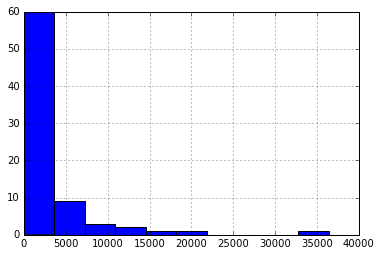

In [225]:
%matplotlib inline
master_data['followers'].hist()

plt.savefig('CandidatesTwitter-DataQualityReport-Histogram-Followers.png')

print("Number of followers:")

Number of follow:


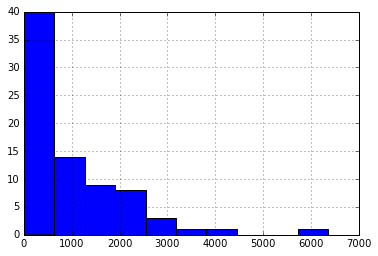

In [226]:
%matplotlib inline
master_data['following'].hist()
plt.savefig('CandidatesTwitter-DataQualityReport-Histogram-Following.png')


print("Number of follow:")

Number of tweets:


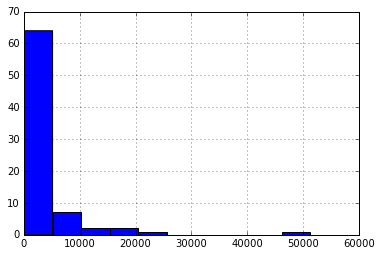

In [227]:
%matplotlib inline
master_data['tweets'].hist()
plt.savefig('CandidatesTwitter-DataQualityReport-Histogram-Tweets.png')

print("Number of tweets:")

Average number of follower change:


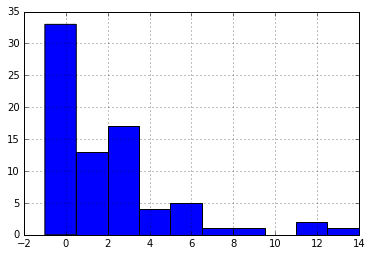

In [228]:
%matplotlib inline
master_data['day_follower_change'].hist()
plt.savefig('CandidatesTwitter-DataQualityReport-Histogram-DayFollowerChange.png')

print("Average number of follower change:")

Overall follower change:


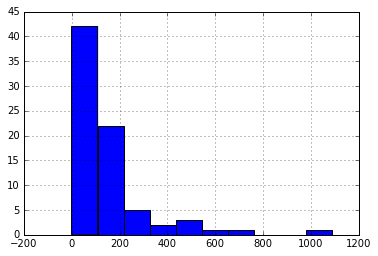

In [229]:
%matplotlib inline
master_data['overall_follower_change'].hist()
plt.savefig('CandidatesTwitter-DataQualityReport-Histogram-OverallFollowerChange.png')

print("Overall follower change:")

##### II. [5pt] Plot box plots for all the continuous features.

Followers:


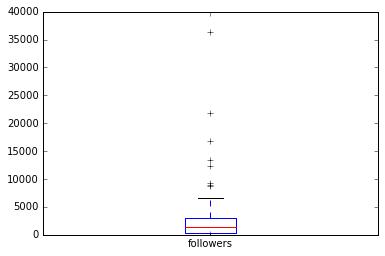

In [230]:
%matplotlib inline
master_data['followers'].plot(kind='box')
plt.savefig('CandidatesTwitter-DataQualityReport-BoxPlot-Followers.png')

print("Followers:")

Following:


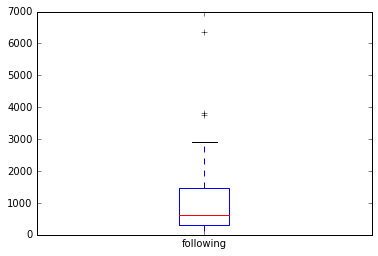

In [231]:
%matplotlib inline
master_data['following'].plot(kind='box')
plt.savefig('CandidatesTwitter-DataQualityReport-BoxPlot-Following.png')

print("Following:")

Number of tweets:


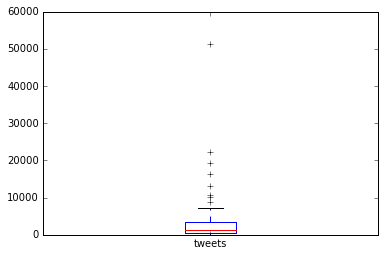

In [232]:
%matplotlib inline
master_data['tweets'].plot(kind='box')
plt.savefig('CandidatesTwitter-DataQualityReport-BoxPlot-Tweets.png')

print("Number of tweets:")

Day follower change:


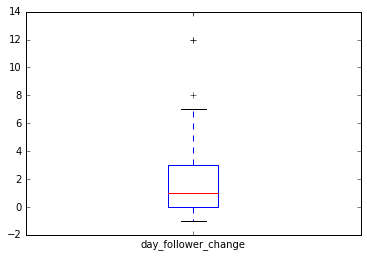

In [233]:
%matplotlib inline
master_data['day_follower_change'].plot(kind='box')
plt.savefig('CandidatesTwitter-DataQualityReport-BoxPlot-DayFollowerChange.png')

print("Day follower change:")

Overall follower change:


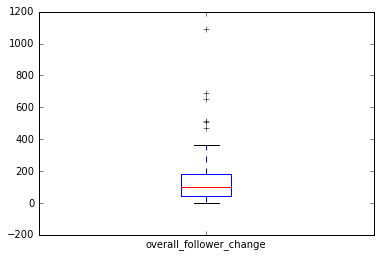

In [234]:
%matplotlib inline
master_data['overall_follower_change'].plot(kind='box')
plt.savefig('CandidatesTwitter-DataQualityReport-BoxPlot-OverallFollowerChange.png')

print("Overall follower change:")

##### II. [5pt] Plot bar plots for all the categorical features.

Gender:


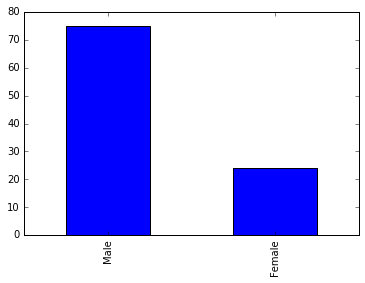

In [235]:
%matplotlib inline
master_data['Gender'].value_counts().plot(kind='bar')
plt.savefig('CandidatesTwitter-DataQualityReport-BarPlot-Gender.png')

print("Gender:")

Elected:


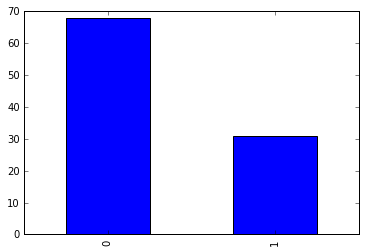

In [236]:
%matplotlib inline
master_data['Elected'].value_counts().plot(kind='bar')
plt.savefig('CandidatesTwitter-DataQualityReport-BarPlot-Elected.png')

print("Elected:")

On Twitter:


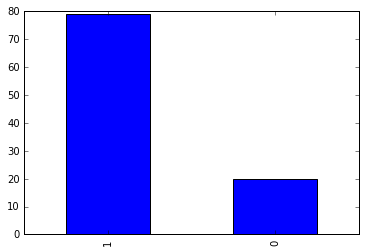

In [237]:
%matplotlib inline
master_data['OnTwitter'].value_counts().plot(kind='bar')
plt.savefig('CandidatesTwitter-DataQualityReport-BarPlot-OnTwitter.png')

print("On Twitter:")

Constituency:


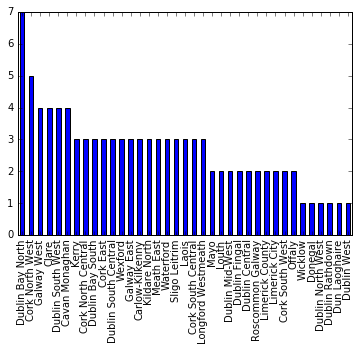

In [238]:
%matplotlib inline
master_data['Constituency'].value_counts().plot(kind='bar')
plt.savefig('CandidatesTwitter-DataQualityReport-BarPlot-Constituency.png')

print("Constituency:")

Last Tweet:


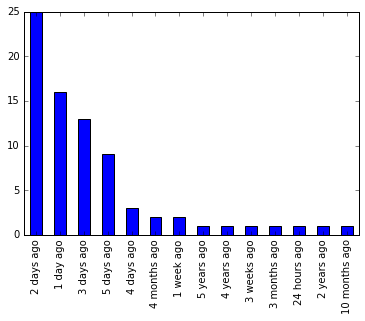

In [239]:
%matplotlib inline
master_data['last_tweet'].value_counts().plot(kind='bar')
plt.savefig('CandidatesTwitter-DataQualityReport-BarPlot-LastTweet.png')

print("Last Tweet:")

Party:


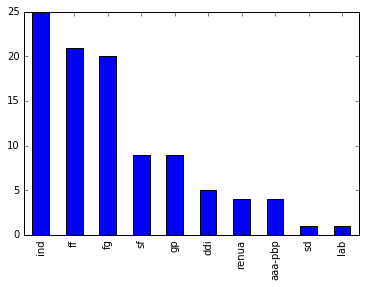

In [240]:
%matplotlib inline
master_data['Party'].value_counts().plot(kind='bar')
plt.savefig('CandidatesTwitter-DataQualityReport-BarPlot-Party.png')

print("Party:")

##### II. [5pt] Save all the tables and plots into files with self-explanatory names.

The data quality reports and the plots were saved as they were generated (see above)

In [241]:
#save the master file
master_data.to_csv("CandidatesTwitter-MasterTable.csv")

#### III. [30pt] Data Understanding: Prepare a data quality plan for the merged CSV file.

##### III. [10pt] Mark down all the features where there are problems.

In [242]:
#In order to prepare the data quality plan, I would like to calculate the outliers 
#Therefore I will calculate the upper and lower bounds on all the continuous features

for feature in continuous_features:
    q1 = master_data[feature].quantile(0.25)
    q3 = master_data[feature].quantile(0.75)
    iqr = q3 - q1
    print(feature)
    print("\t- IQR:", iqr, "\n\t- lower outlier bound:", q1 - 1.5 * iqr,
         "\n\t- higher outlier bound:", q3 + 1.5 * iqr)
    print("")

followers
	- IQR: 2648.0 
	- lower outlier bound: -3639.0 
	- higher outlier bound: 6953.0

following
	- IQR: 1171.0 
	- lower outlier bound: -1462.5 
	- higher outlier bound: 3221.5

overall_follower_change
	- IQR: 134.0 
	- lower outlier bound: -154.0 
	- higher outlier bound: 382.0

tweets
	- IQR: 2985.0 
	- lower outlier bound: -4033.5 
	- higher outlier bound: 7906.5

day_follower_change
	- IQR: 3.0 
	- lower outlier bound: -4.5 
	- higher outlier bound: 7.5



###### Data quality plan

| feature                 |Data quality issue|Potential Handling Strategies|
|-------------------------|---|---|---|---|
| Day follower change     |missing values (22%)|   |
| Day follower change     |outliers (high)|   |
| Followers               |missing values (22%)|   |
| Followers               |outliers (high)|   |
| Following               |missing values (22%)|   |
| Following               |outliers (high)|   |
| Overall follower change |missing values (22%)|   |
| Overall follower change |outliers (high)|   |
| Tweets                  |missing values (22%)|   |
| Tweets                  |outliers (high)|   |
| Last tweet              |missing values (22%)||   |


##### III. [10pt] Propose solutions to deal with the problems identified.

###### Data quality plan

| feature                 |Data quality issue|Potential Handling Strategies|
|-------------------------|---|---|---|---|
| Day follower change     |missing values (22%)|Imputation (median: 1)|
| Day follower change     |outliers (high)|Clamp transformation (manual: higher outlier bound)|
| Followers               |missing values (22%)|Imputation (median: 1340)|
| Followers               |outliers (high)|Clamp transformation (manual: higher outlier bound)|
| Following               |missing values (22%)|Imputation (median: 632)|
| Following               |outliers (high)|Clamp transformation (manual: higher outlier bound)|
| Overall follower change |missing values (22%)|Imputation (median: 102)|
| Overall follower change |outliers (high)|Clamp transformation (manual: higher outlier bound)|
| Tweets                  |missing values (22%)|Imputation (median: 1186)|
| Tweets                  |outliers (high)|Clamp transformation (manual: higher outlier bound)|
| Last tweet              |missing values (22%)|Imputation (top value: 2 days ago)|


##### III. [10pt] Apply your solutions to obtain a new CSV file where data quality issues were addressed. Explain why did you choose one solution over (potentially many) other.

In [243]:
for i in range(master_data.shape[0]):
    # Check and replace missing values
    if np.isnan(master_data['day_follower_change'][i]):
        master_data.set_value(i, 'day_follower_change', 1)
    # Check and replace outliers
    if master_data['day_follower_change'][i] > 7.5:
        master_data.set_value(i, 'day_follower_change', 7.5)
    
    #Repeat this for all problematic features.
    if np.isnan(master_data['followers'][i]):
        master_data.set_value(i, 'followers', 1340)
    if master_data['followers'][i] > 6953:
        master_data.set_value(i, 'followers', 6953)
        
    if np.isnan(master_data['following'][i]):
        master_data.set_value(i, 'following', 632)
    if master_data['following'][i] > 3221.5:
        master_data.set_value(i, 'following', 3221.5)
        
    if np.isnan(master_data['overall_follower_change'][i]):
        master_data.set_value(i, 'overall_follower_change', 102)
    if master_data['overall_follower_change'][i] > 382:
        master_data.set_value(i, 'overall_follower_change', 382)

    if np.isnan(master_data['tweets'][i]):
        master_data.set_value(i, 'tweets', 1186)
    if master_data['tweets'][i] > 7906.5:
        master_data.set_value(i, 'tweets',  7906.5)
        
    if type(master_data['last_tweet'][i]) == float:
        master_data.set_value(i, 'last_tweet', '2 days ago')

#Save the new table to csv.
master_data.to_csv('CandidatesTwitter-MasterTable-PostDQP.csv')

Explanation:
- The missing instances result from candidates not being on Twitter, and therefore not getting any Twitter statistics. Imputation was selected over complete case analysis and deriving a missing indicator feature. I decided against complete case analysis as it would result in significant data loss. I decided against deriving a missing indicator feature because the existing feature "on twitter" already overs that feature.
- For outliers, I decided to clamp the extreme value to the bound I have calculated previously. The outliers values are likely valid data and therefore I chose not to remove those instances.

#### IV. [20pt] Data Understanding: Exploring relationships between feature pairs:

##### IV. [10pt] Choose a subset of 10 features and plot pairwise feature interaction (e.g., continuous-continuous feature plot or continuous-categorical plots). Compute correlations for the numeric features.

My 10 features:

Categorical:
Gender, party, elected, on twitter, constituency

Numerical:
following, followers, overall follower change, tweets, day follower change

In [244]:
#Correlation table
master_data.corr()

,day_follower_change,followers,following,overall_follower_change,tweets
day_follower_change,1.000000,0.454109,0.222393,0.742521,0.198323
followers,0.454109,1.000000,0.442233,0.587206,0.592239
following,0.222393,0.442233,1.000000,0.316144,0.601016
overall_follower_change,0.742521,0.587206,0.316144,1.000000,0.248151
tweets,0.198323,0.592239,0.601016,0.248151,1.000000


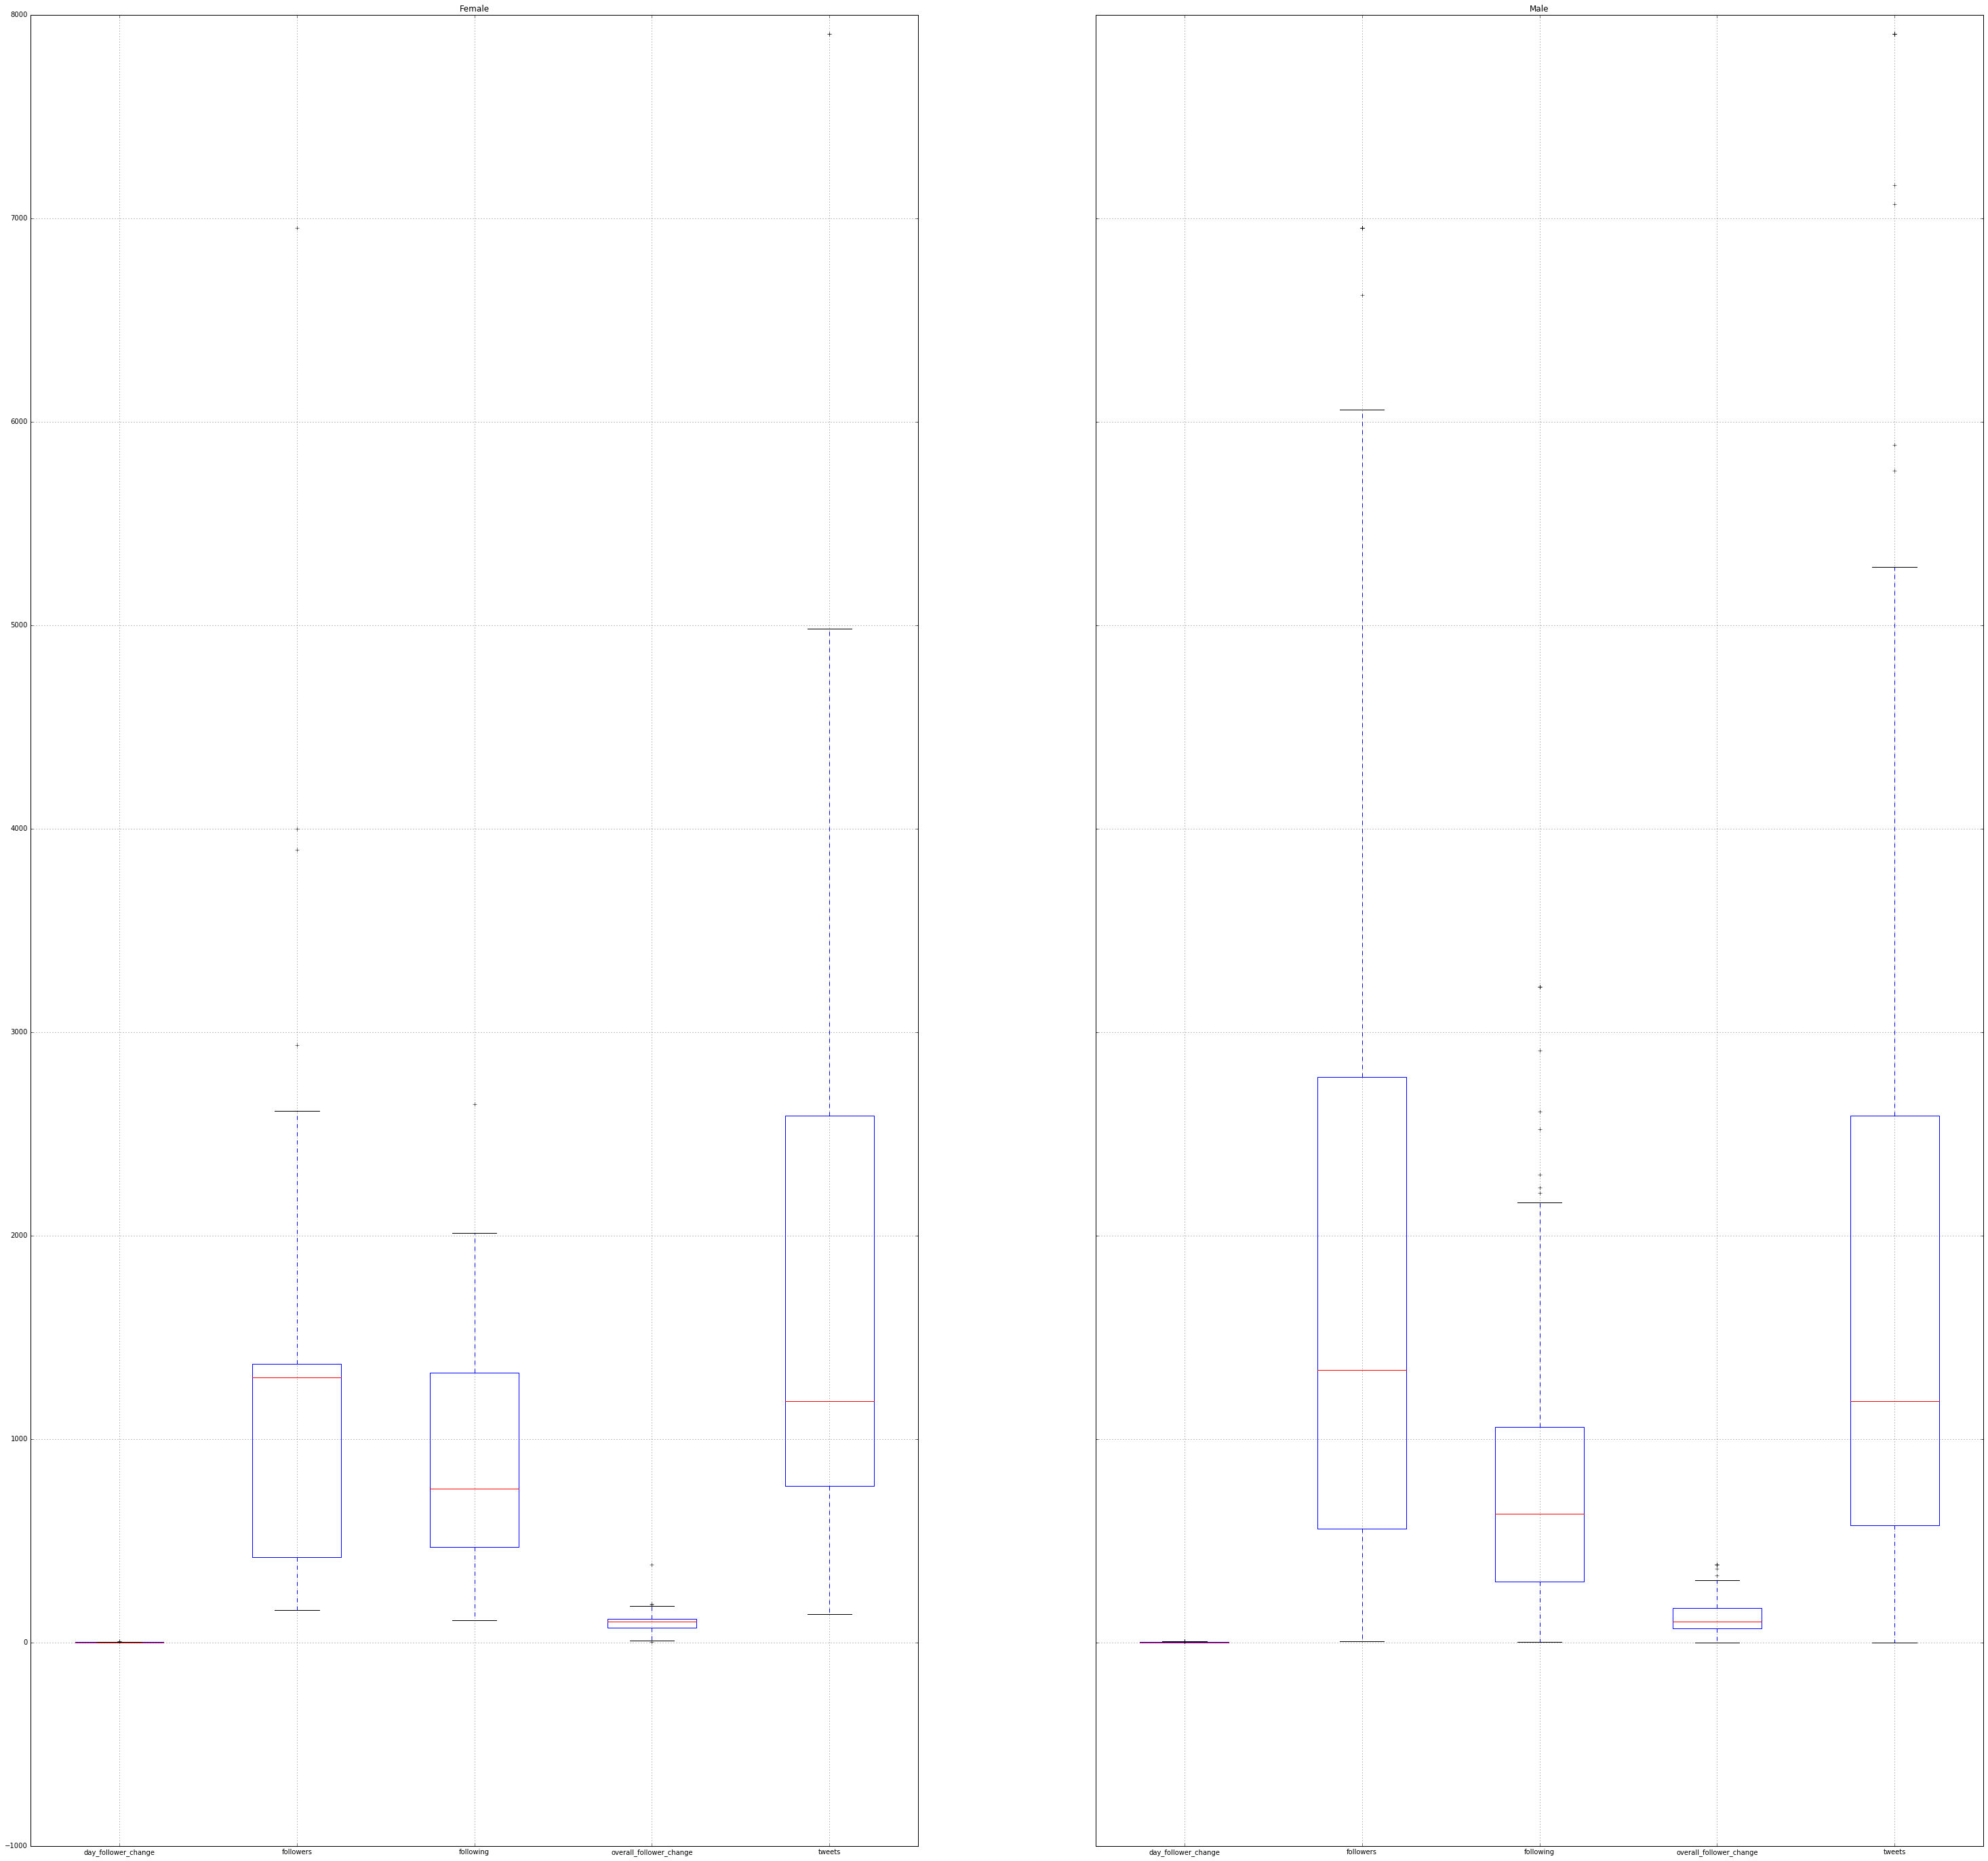

In [245]:
#plotting continuous features by gender
master_data.groupby('Gender').boxplot(figsize=(50, 50), return_type='dict')
plt.savefig('BoxPlot-ContinuousFeatures-ByParty.png')

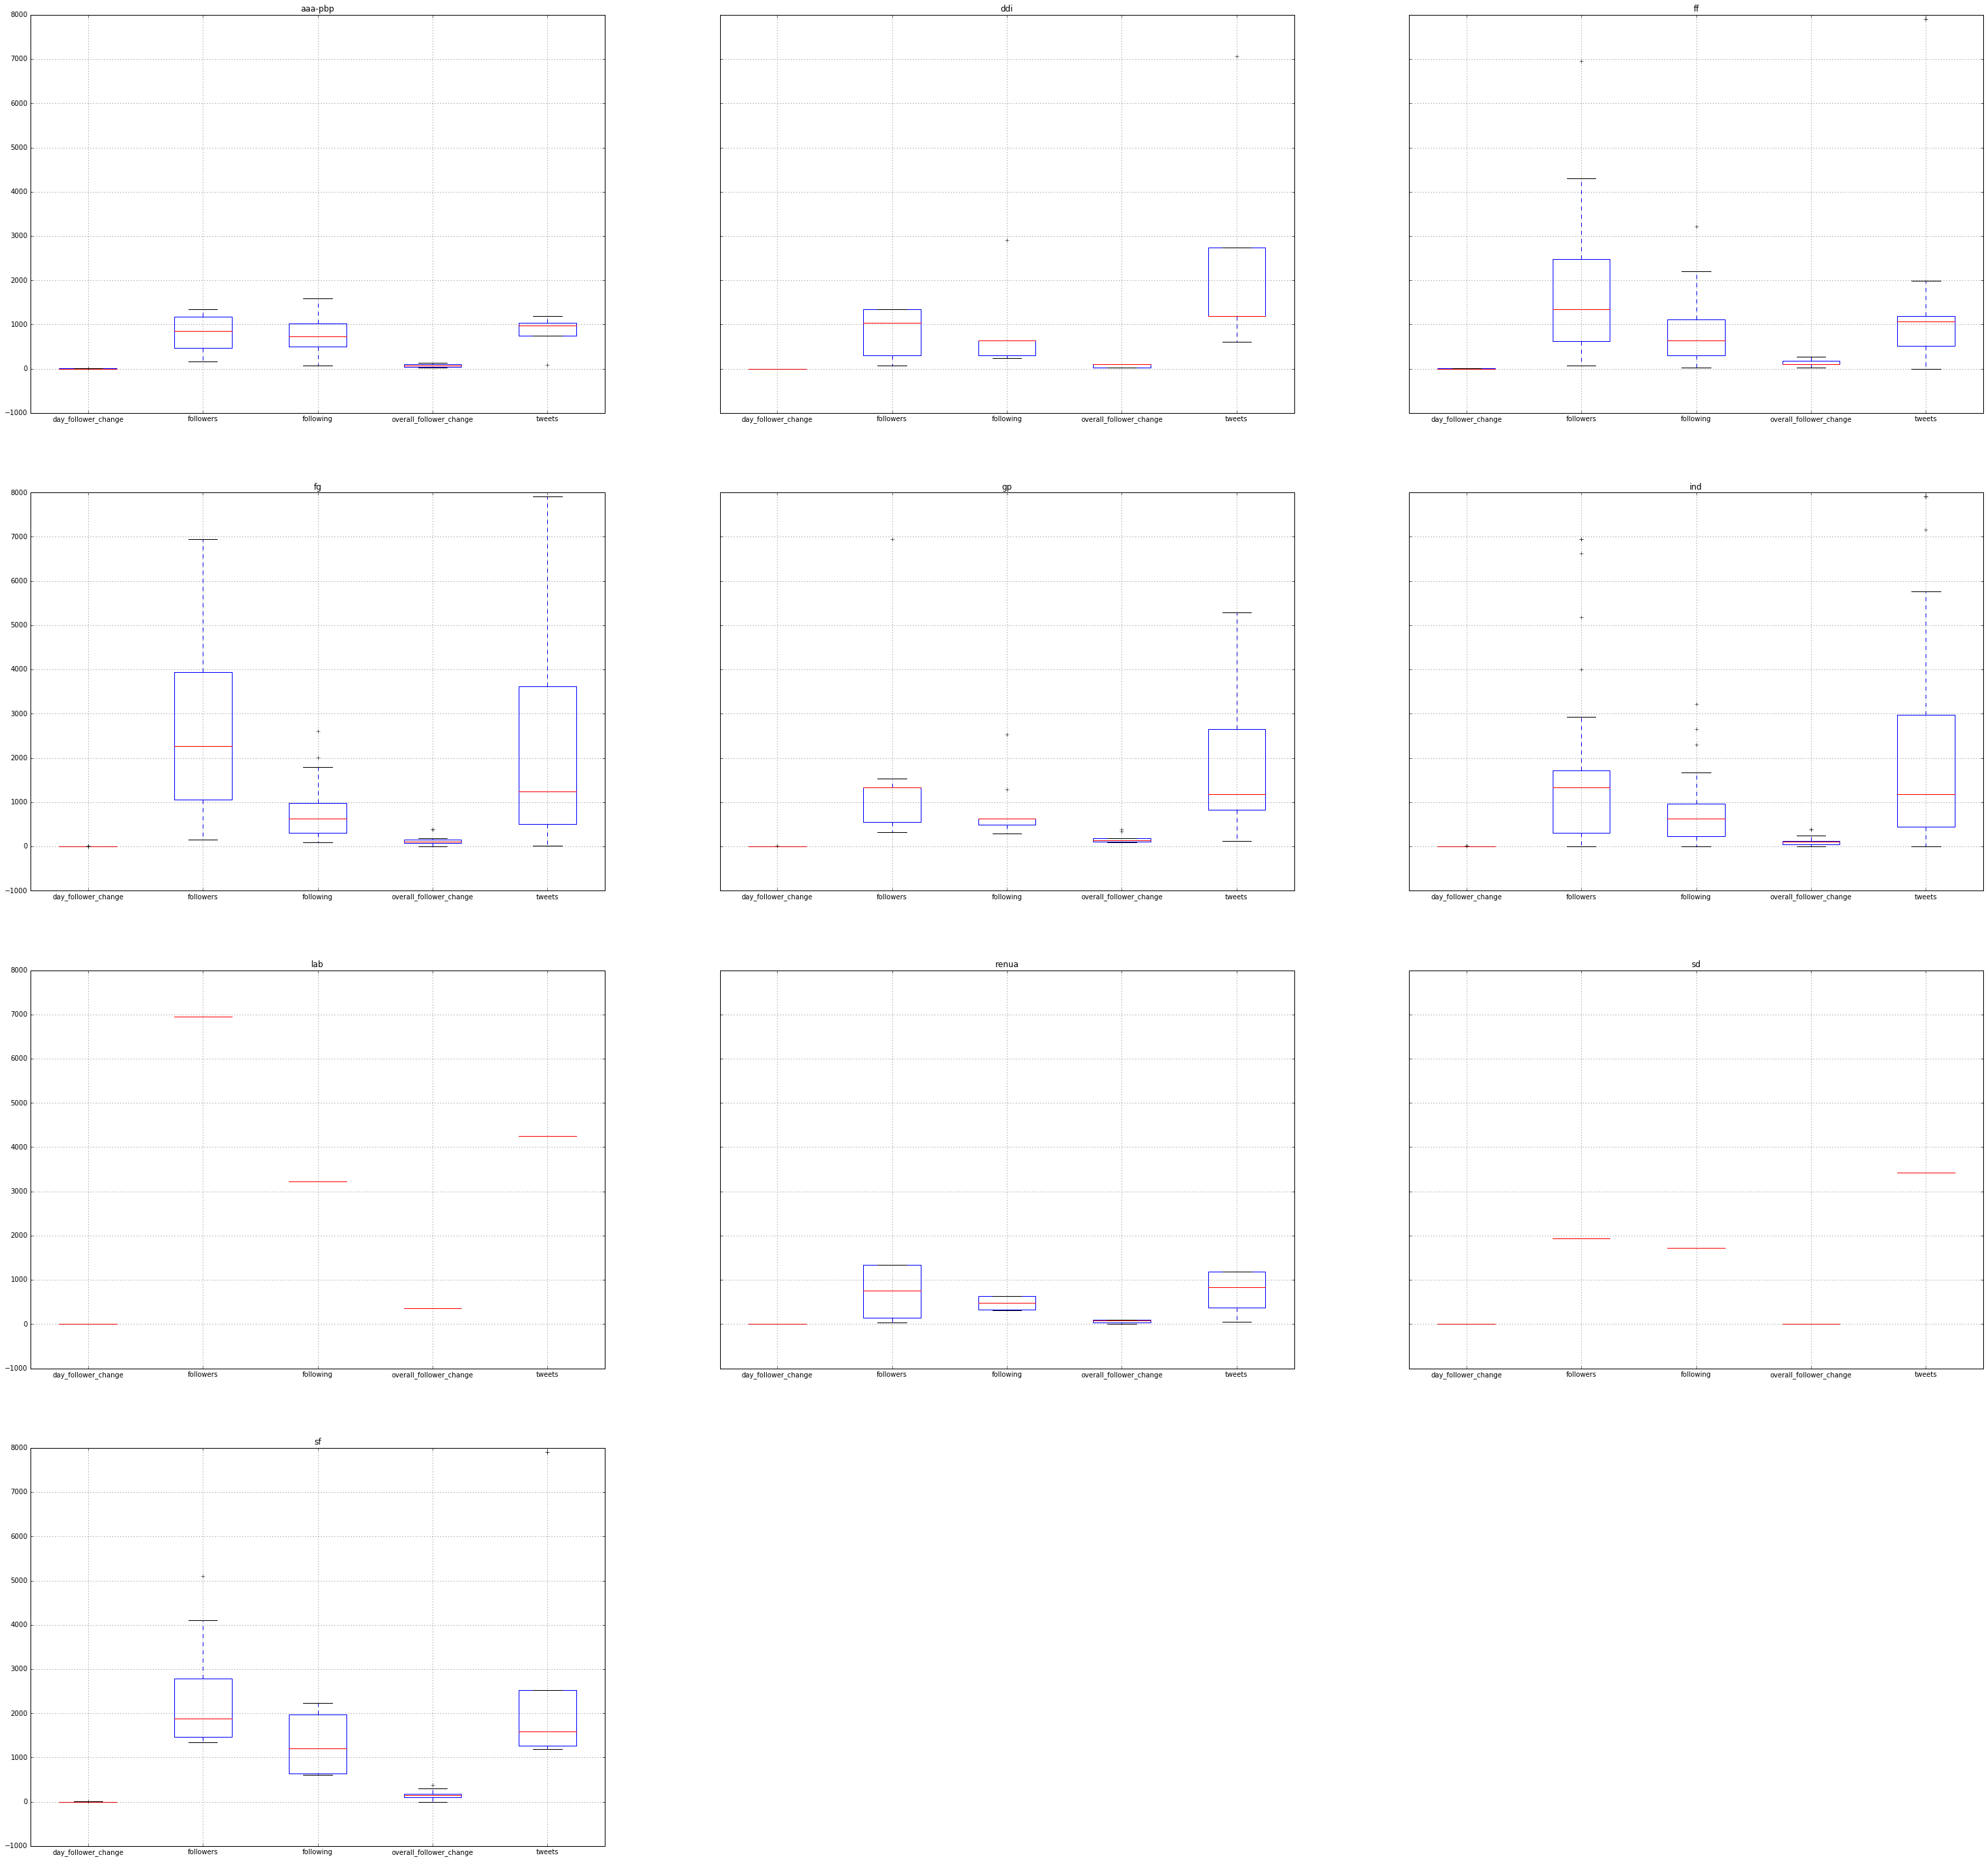

In [246]:
#plotting continuous features by party
master_data.groupby('Party').boxplot(figsize=(50, 50), return_type='dict')
plt.savefig('BoxPlot-ContinuousFeatures-ByParty.png')

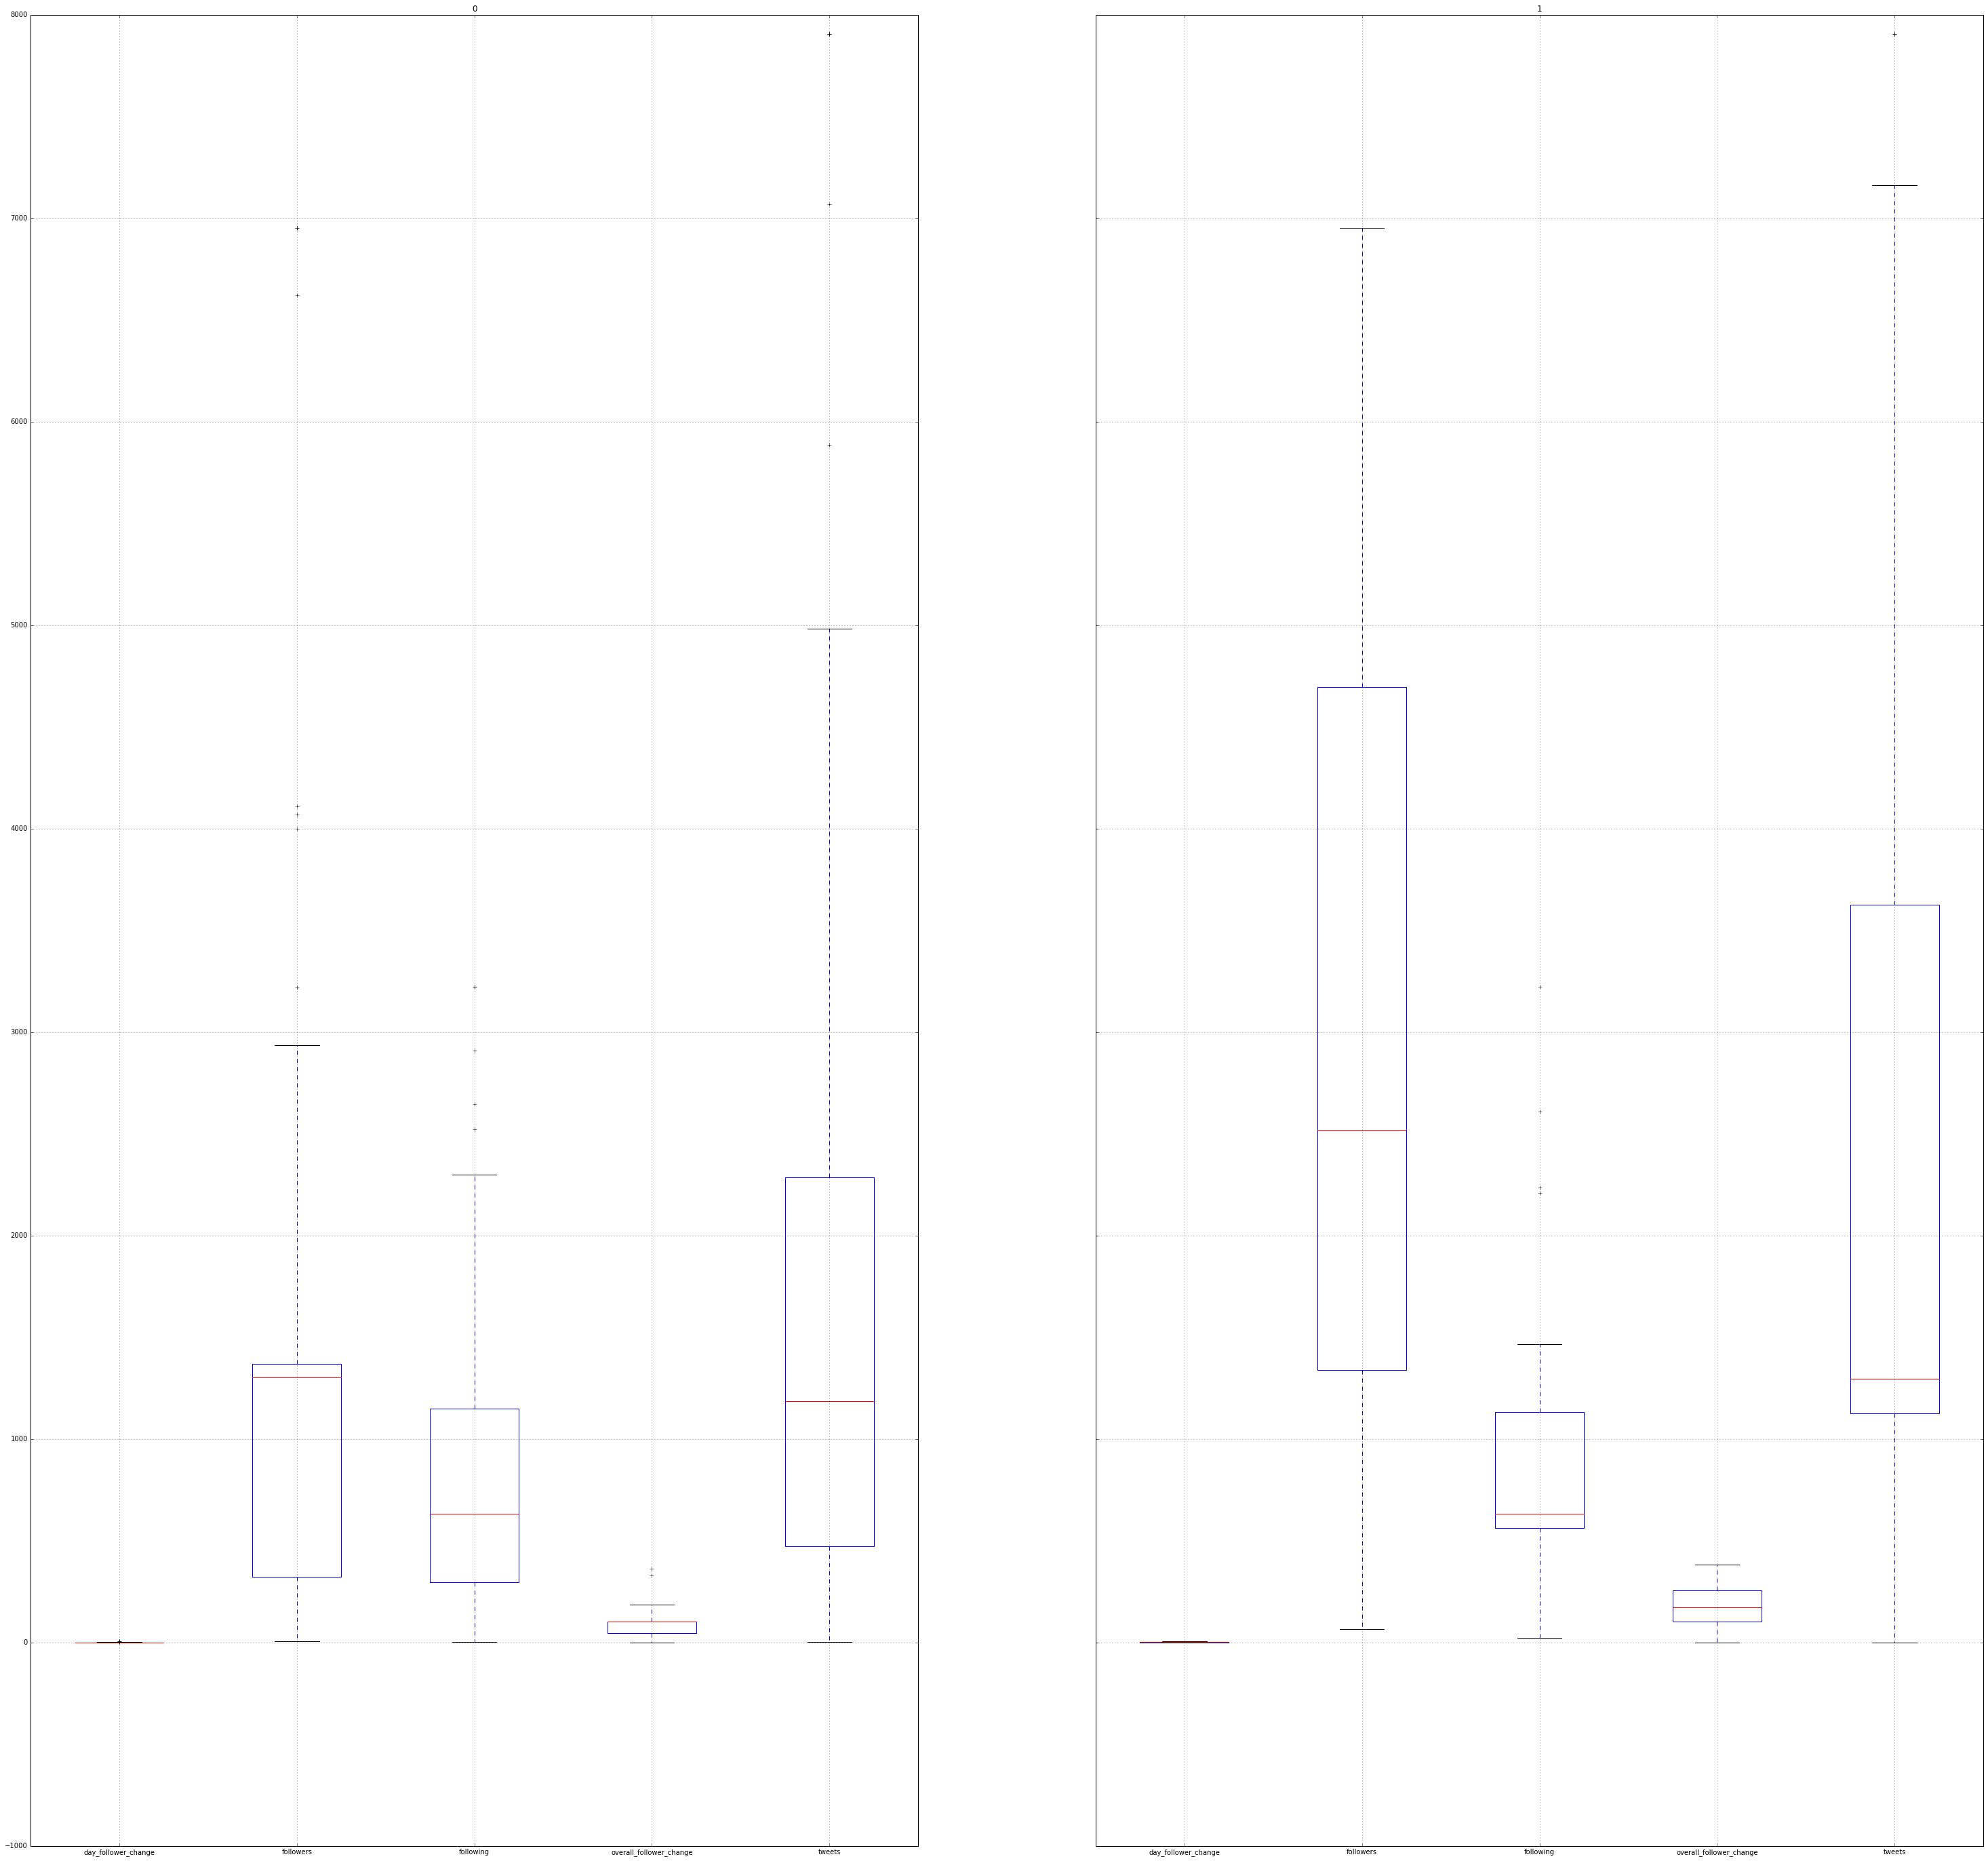

In [247]:
#plotting continuous features by elected status
master_data.groupby('Elected').boxplot(figsize=(50, 50), return_type='dict')
plt.savefig('BoxPlot-ContinuousFeatures-ByElected.png')

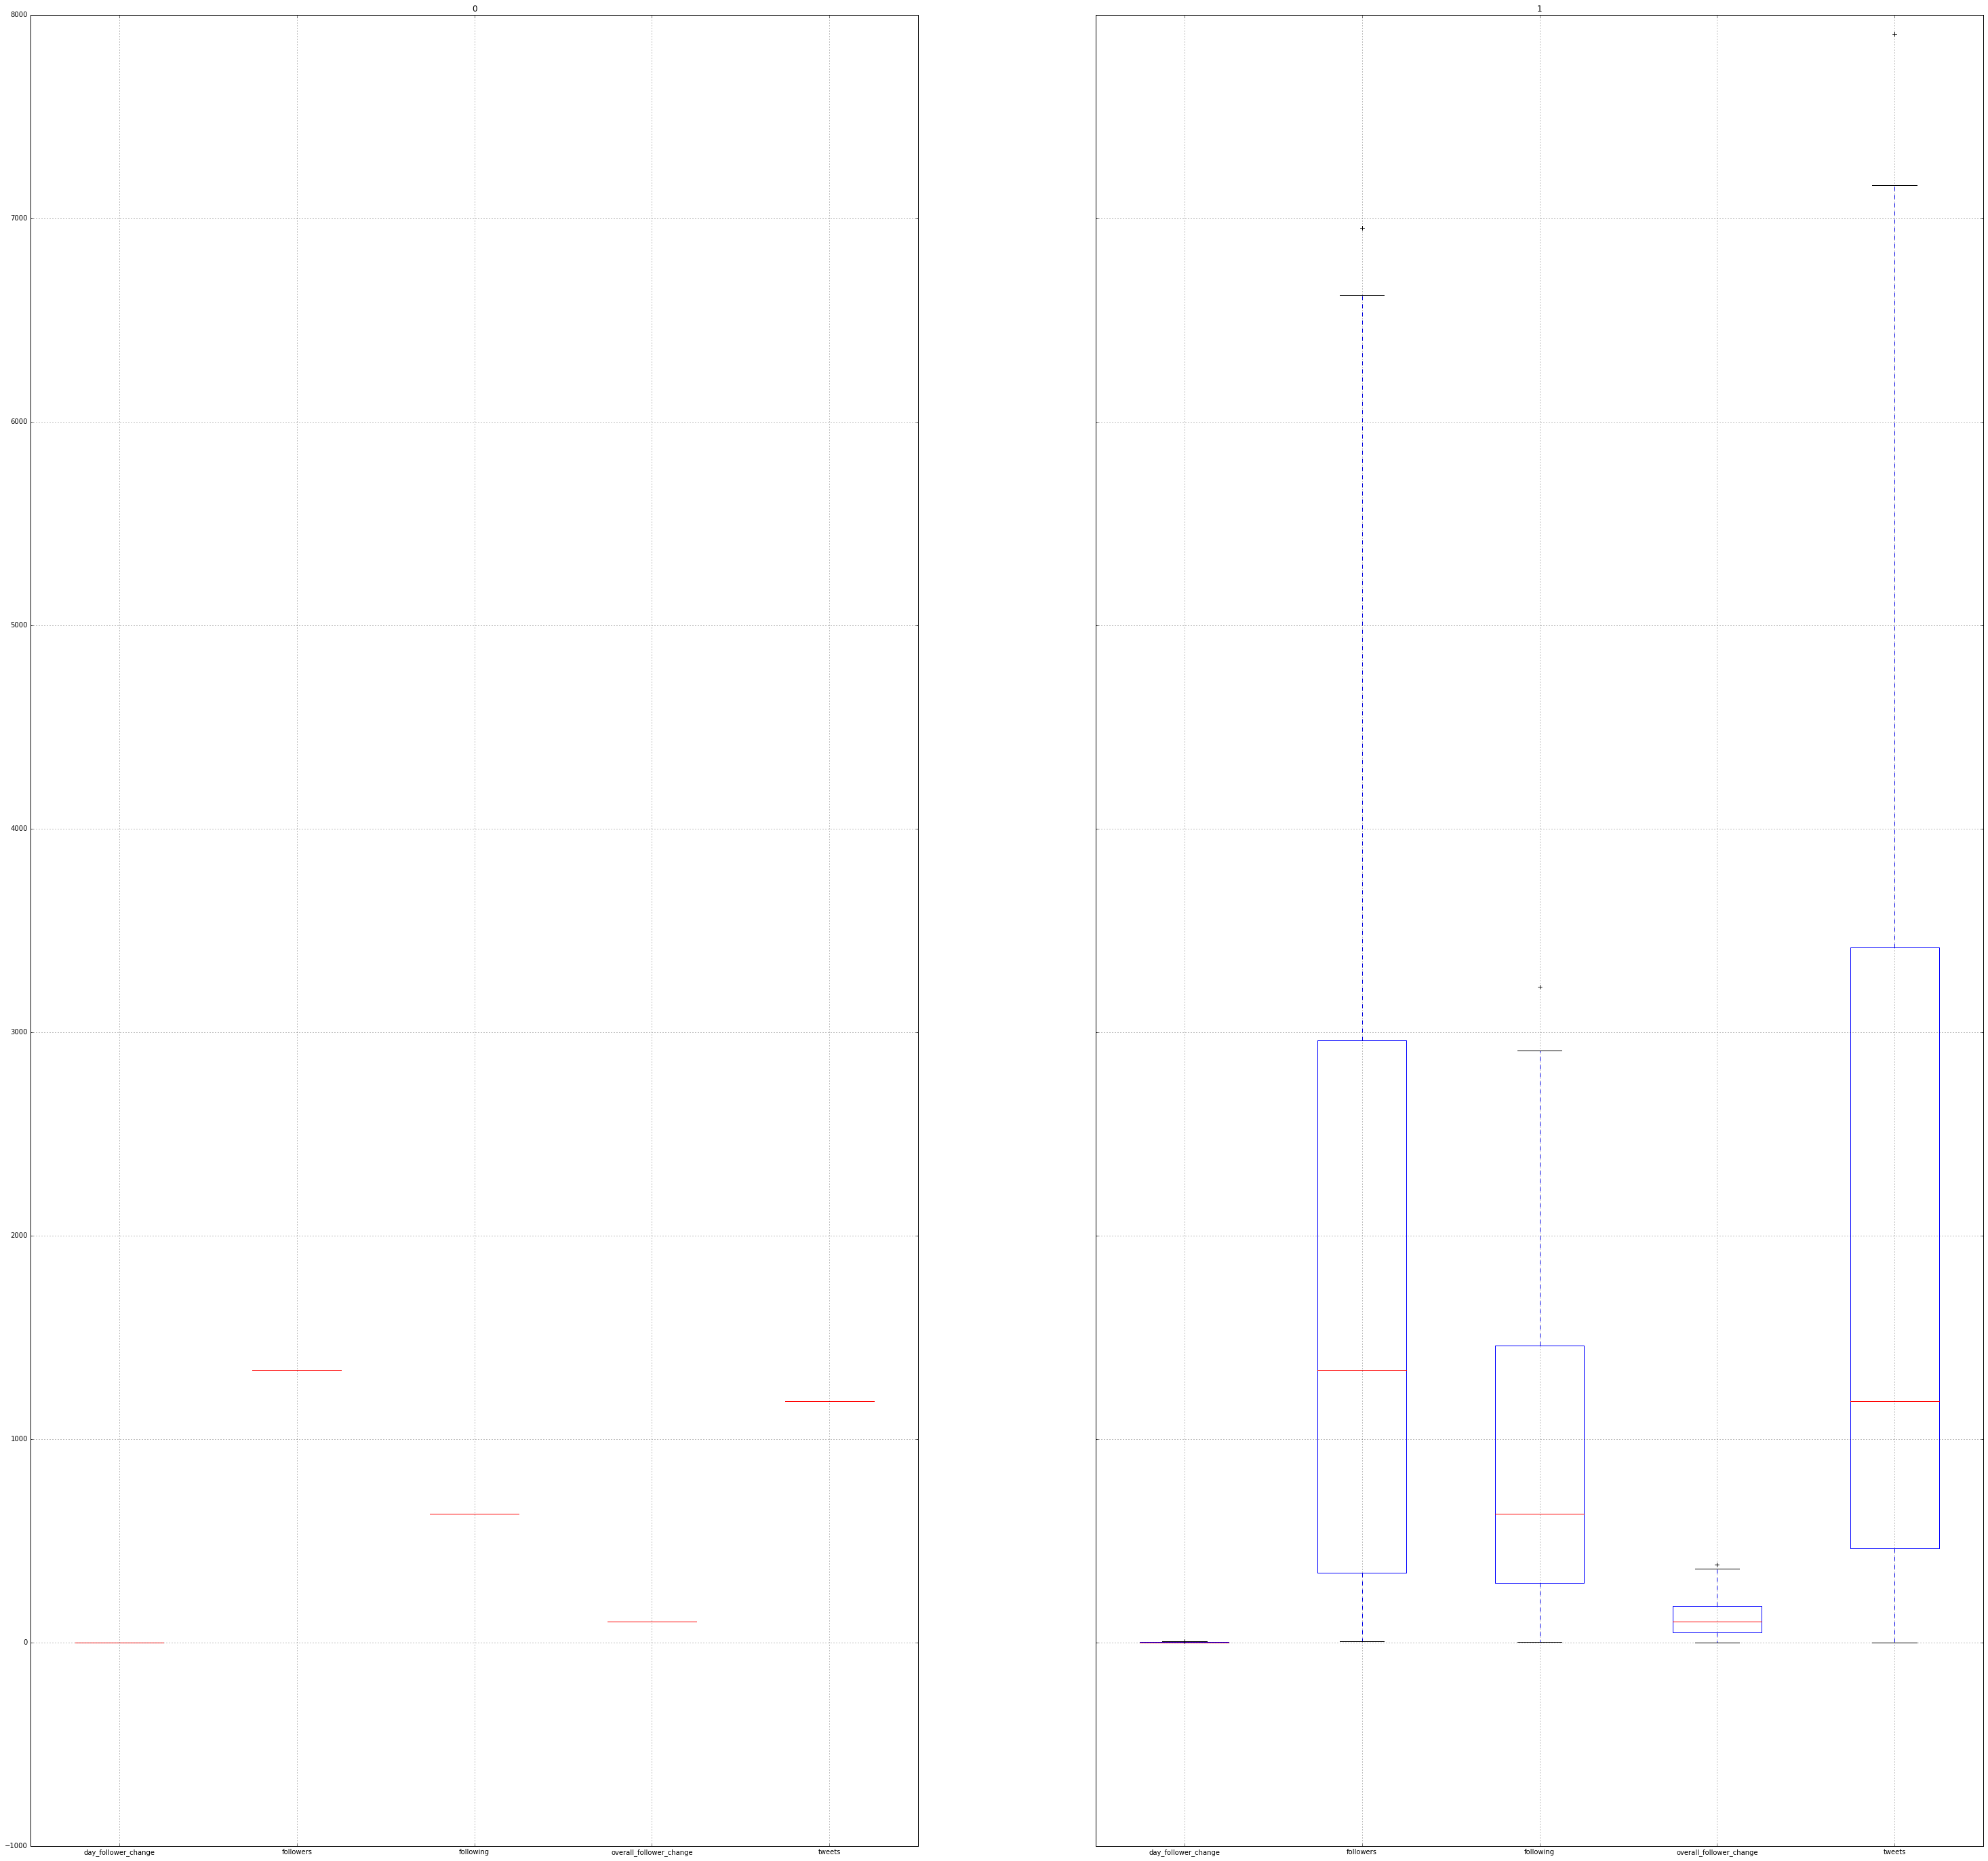

In [248]:
#plotting continuous features by presence on Twitter
master_data.groupby('OnTwitter').boxplot(figsize=(50, 50), return_type='dict')
plt.savefig('BoxPlot-ContinuousFeatures-ByOnTwitter.png')

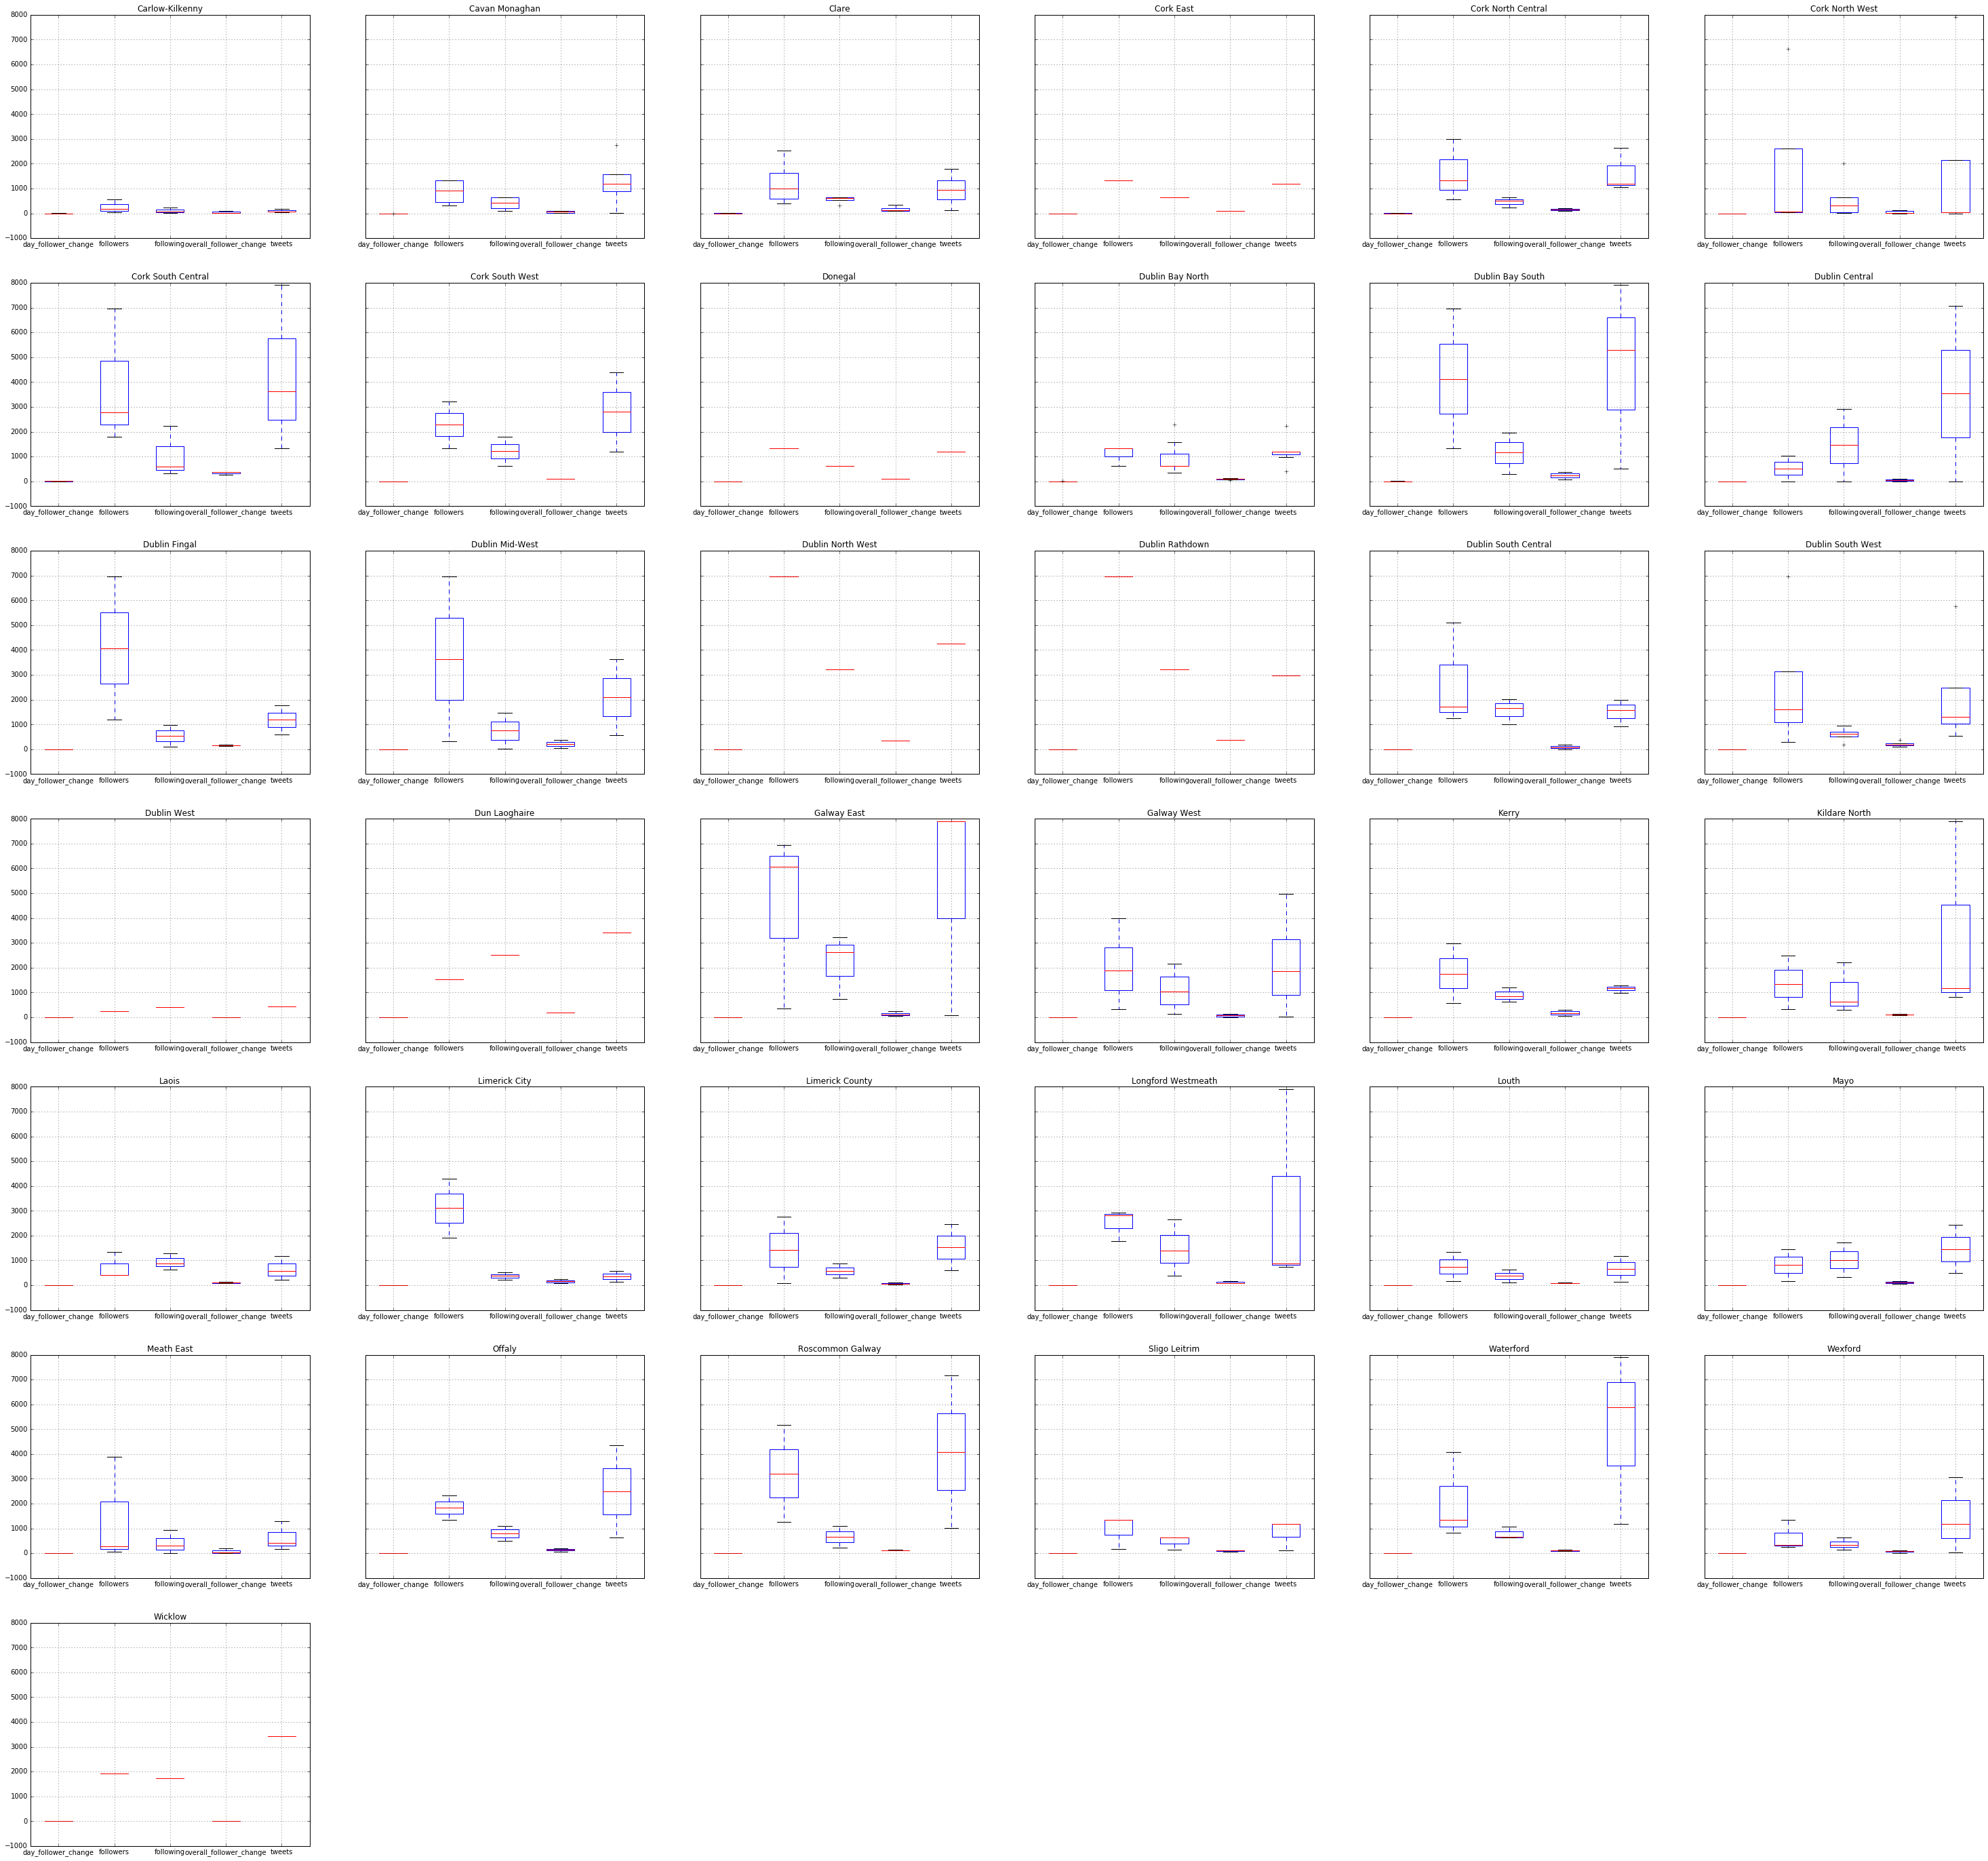

In [249]:
#plotting continuous features by constituency
master_data.groupby('Constituency').boxplot(figsize=(50, 50), return_type='dict')
plt.savefig('BoxPlot-ContinuousFeatures-ByConstituency.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d55871438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5d58e9ba58>]], dtype=object)

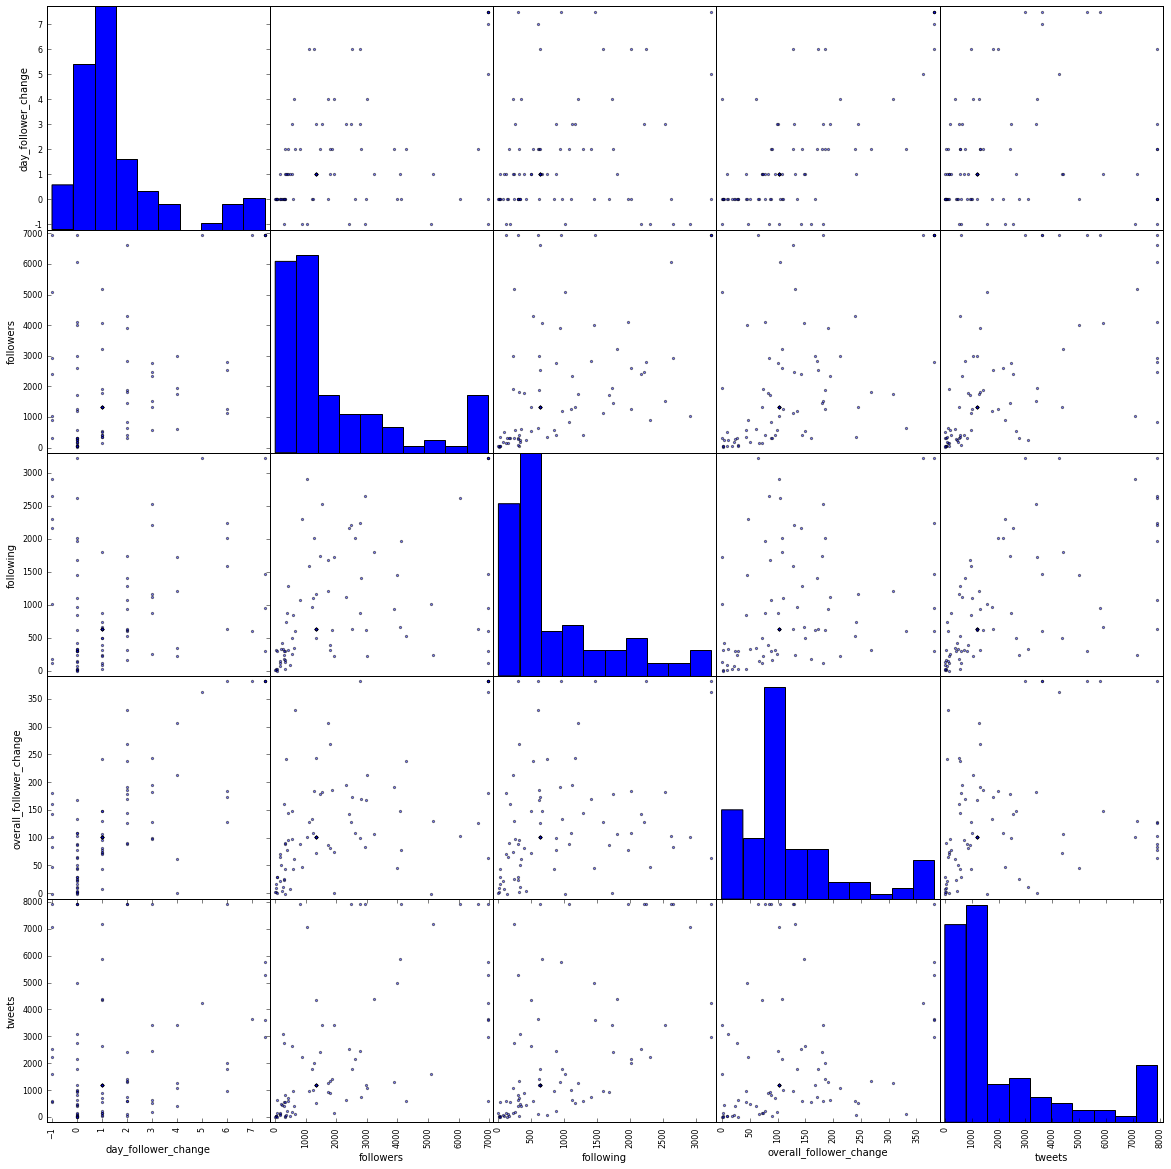

In [250]:
#plotting a scatter matrix
pd.tools.plotting.scatter_matrix(master_data, figsize=(20, 20))

In [251]:
#Creation of 2 new tables, splitting elected and unelected candidates, in order to compare their metrics
elected_candidates = master_data.loc[master_data['Elected'] == 1]
unelected_candidates = master_data.loc[master_data['Elected'] == 0]

In [252]:
elected_candidates.describe().T

,count,mean,std,min,25%,50%,75%,max
day_follower_change,31,2.870968,2.559192,-1,1.0,2,4.0,7.5
followers,31,3121.774194,2197.428766,66,1340.0,2521,4696.5,6953.0
following,31,938.790323,738.782600,23,562.5,632,1133.5,3221.5
overall_follower_change,31,195.516129,114.912103,-1,102.0,173,256.5,382.0
tweets,31,2533.467742,2483.436168,1,1125.5,1295,3625.5,7906.5


In [253]:
elected_candidates.select_dtypes(['category']).describe().T

,count,unique,top,freq
Gender,31,2,Male,28
Party,31,5,ff,13
Constituency,31,22,Cork South Central,3
Elected,31,1,1,31
OnTwitter,31,2,1,27
last_tweet,31,6,2 days ago,13


In [254]:
unelected_candidates.describe().T

,count,mean,std,min,25%,50%,75%,max
day_follower_change,68,0.897059,1.446970,-1,0.00,1.0,1.00,6.0
followers,68,1460.602941,1661.860800,5,323.00,1302.5,1370.50,6953.0
following,68,868.926471,826.753263,2,295.75,632.0,1150.00,3221.5
overall_follower_change,68,91.147059,66.173960,-1,46.50,102.0,103.25,362.0
tweets,68,1865.830882,2224.241207,2,472.50,1186.0,2286.00,7906.5


In [255]:
unelected_candidates.select_dtypes(['category']).describe().T

,count,unique,top,freq
Gender,68,2,Male,47
Party,68,10,ind,21
Constituency,68,34,Dublin Bay North,7
Elected,68,1,0,68
OnTwitter,68,2,1,52
last_tweet,68,13,2 days ago,34


###### [10pt] Discuss your findings from the plots above. Do you find any features indicative of the candidate getting elected?

Looking at the plots, I found that:
- parties with the most followers are also the ones with the most candidates elected. Fine Gael, Fianna Fail, Sinn Fein and the Independants are the candidates with the highest numbers of followers and they are also the most elected.
- The number of tweets, which can be representative of the efforts put by a party in their online communication strategy, seems to be barely representative of parties likely be to be elected. For example, both Direct Democracy ireland and the Green Party have a high number of tweets but only a few of their candidates were elected.
- At a candidates' level, their number of followers on Twitter seems to be indicative of whether the candidate is going to be elected. The median number of followers of candidates who were NOT elected is about 1300, while it is about 2500 for candidates who were elected.
- The daily / overall follower change also seems to be indicative of whether a candidate is elected. It is higher for elected candidates.
- The number of tweets and the number of people that a candidate follows on Twitter does not seem to be representative of their election.
